# S&P500 Pricing vs. Corporate Earnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.1, rc={
    'figure.figsize': (15, 10),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666'
})

import yfinance as yf

c:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Data From: https://fred.stlouisfed.org/series/CP

In [2]:
corporate_earnings = pd.read_csv('C:/Users/Matthew/jupyternotes/Stocks/Stock Valuations/S&P500 Vs Corporate Earnings/CP.csv')

In [3]:
data = yf.download('^GSPC')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...
2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,3991.239990,4746120000
2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4001.050049,4630150000
2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,3935.179932,4683220000


In [4]:
corporate_earnings.index = corporate_earnings['DATE']
corporate_earnings.drop(columns=['DATE'], inplace=True)
corporate_earnings = corporate_earnings.squeeze()
corporate_earnings.index = pd.to_datetime(corporate_earnings.index)

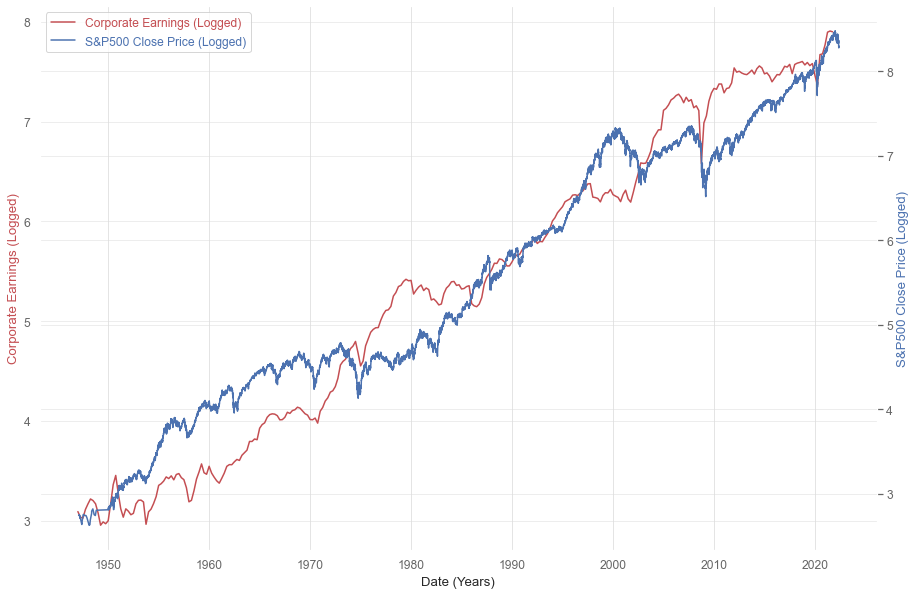

In [5]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Date (Years)")
host.set_ylabel("Corporate Earnings (Logged)")
par.set_ylabel("S&P500 Close Price (Logged)")


p1, = host.plot(corporate_earnings.apply(np.log), color='r', label='Corporate Earnings (Logged)')
p2, = par.plot(data['Close'].apply(np.log).loc[corporate_earnings.index[0]:], label='S&P500 Close Price (Logged)')

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()